# Alternus Vera 

Course code : **CMPE-257** 
    
Group name : **JEMS**
    
Name: **Matt DiPietro** 

-----

GitHub URL: https://github.com/Mdipietro1990/AlternusVera


### Liar Liar Pants on Fire Dataset Description 
- It has 3 files test, training and valid.
- Each file has 14 columns
    
    Column 1: the ID of the statement ([ID].json).
    
    Column 2: the label.
    
    Column 3: the statement.
    
    Column 4: the subject(s).
    
    Column 5: the speaker.
    
    Column 6: the speaker's job title.
    
    Column 7: the state info.
    
    Column 8: the party affiliation.
    
    Column 9-13: the total credit history count, including the current statement.
    
    Column 14: the context (venue / location of the speech or statement).

### Process of My Approach 
- Load the Data
- Distillation Process
    - Data Cleaning and Text Preprocessing
    - Visualization
- **Feature 1 :** Sentiment Analysis 
- **Feature 2 :** LDA Topic Modelling
- **Feature 3 :** Sensationalism 
- **Feature 4 :** Political Affiliation 
- **Feature 5 :** Clickbait 
- **Feature 6 :** Spam 
- **Feature 7 :** Author Credibility 
- **Feature 8 :** Source Reputation
- **Feature 9 :** Content Length     
- **Feature 10 :** Word Frequency 
- Vector Classification Modeling 
- Ranking and Importance
- Merge all features and individual contributions
- Form Polynomial Equation 
    

### Feature Selection
**List top Features Selected based on research articles**



### Team Contributions example:

|Features  |  Member |
|-----|-----|
| ClickBait                         |  Matt DiPietro |  
| Feature name(s)                 |  Member name(s) | 
| Feature name(s)                   |  Member name(s)  |   
| Feature name(s)                             |  Member name(s) |

 
#### Enrichment Dataset Details

- SenticNet5 sensational words corpus
- Google News 3million words corpus for spell check
- Sensational Words Dictionary 
- PoliticalFact Fake news and Real News Content 
- Clickbait and non_clickbait datasets
- Spam Dictionary 

#### Libraries Used 

- NLTK 
- Gensim 
- Numpy
- Pandas
- CSV
- WordCloud
- Seaborn
- Scipy
- Regualr Expression
- Matplotlib
- Sklearn 
- RandomForestClassifier
- Linear regression



#### What did I try and What worked? 

> In this sprint I attemted to improve the accuracy of the clickbait model that is used. I first enriched the dataset with 3M rows of new headlines from kaggle. This dataset came from a web scrap of all the headlines from the news organization called enquirer.com. They are know for their biased headlines, designed to drive people to click on the articles(clickbait). So by enriching the current clickbait dataset I am hoping to increase the model prediction accuracy. As well as give the system a larger more varying dataset to use for training the model to detect fake news. Currently the model is using logistic regression to do the prediction but I found that useing random forest classifier has a slightly higher accuracy. I also added in confusion matrix and cross validation functions that helped me visualize the data. I also started off this project with the education topic and found that I was unable to generate sufficent data, however I did enrich the liar liar dataset with some educational fake news data that was classified as fake or real. I then ran the notebook on that new data. 

#### What did not work?

> I attempted to apply linear regression as a predictor and found that this did not work because it was unable to predict new headlines. I tried to enrich the clickbait dataset with recent headlines using an API but I exceeded the amount of API calls and decided to look for a slightly older yet more varied dataset. The new educational fake news data did not add any benifit to the dataset. However I kept it in as part of the data since it did not negatively effect the classifications. 


#### What alternatives did you try?

> I tried to use a model based on a CNN but I was unable to get the classifier to work in the given time. I will attempt this in the next sprint.   

----

In [1]:
import pandas as pd
import numpy as np
import csv
import math
import gensim
from scipy import sparse
import itertools

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from string import punctuation
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import re
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import matplotlib.pyplot as plt
from scipy import sparse
# Code source: https://degravek.github.io/project-pages/project1/2017/04/28/New-Notebook/
# Dataset from Chakraborty et al. (https://github.com/bhargaviparanjape/clickbait/tree/master/dataset)

/anaconda2/lib/python2.7/site-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


[nltk_data] Downloading package stopwords to /Users/matt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/matt/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# Read the test, training and valid data from files that have been enriched with education data

test_filename = 'input_data/dataset/test_education_enrich.tsv'
train_filename = 'input_data/dataset/train_education_enrich.tsv'
valid_filename = 'input_data/dataset/valid_education_enrich.tsv'

colnames = ['jsonid', 'label', 'headline_text', 'subject', 'speaker', 'speakerjobtitle', 'stateinfo','partyaffiliation', 'barelytruecounts', 'falsecounts','halftruecounts','mostlytrueocunts','pantsonfirecounts','context']

train_news = pd.read_csv(train_filename, sep='\t', names = colnames, error_bad_lines=False)
test_news = pd.read_csv(test_filename, sep='\t', names = colnames, error_bad_lines=False)
valid_news = pd.read_csv(valid_filename, sep='\t', names = colnames, error_bad_lines=False)

In [3]:
# Display check the dimensions and the first 2 rows of the file.

print('train dim:',train_news.shape, 'test dim:', test_news.shape)
train_news.iloc[0:2]

('train dim:', (10263, 14), 'test dim:', (1289, 14))


,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.


Adding zero for null values

In [4]:
train_news.fillna(0,inplace=True)
test_news.fillna(0,inplace=True)
valid_news.fillna(0,inplace=True)

In [5]:
train_news

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,0,0,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,0,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
5,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece
6,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,0,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.
7,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa."
8,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,0,0,organization,0.0,0.0,1.0,0.0,1.0,a website
9,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video


## Data Cleaning and Text Preprocessing 

*Steps included in the preprocessing:*
- Remove Special Characters and Punctuations
- Lower case the news
- Tokenization
- Remove Stop Words
- Lemmatization
- Stemming 
- Spell Check 

In [6]:
import re

def cleaning(raw_news):
    import nltk
    
    # 1. Remove non-letters/Special Characters and Punctuations
    news = re.sub("[^a-zA-Z]", " ", raw_news)
    
    # 2. Convert to lower case.
    news =  news.lower()
    
    # 3. Tokenize.
    news_words = nltk.word_tokenize( news)
    
    # 4. Convert the stopwords list to "set" data type.
    stops = set(nltk.corpus.stopwords.words("english"))
    
    # 5. Remove stop words. 
    words = [w for w in  news_words  if not w in stops]
    
    # 6. Lemmentize 
    wordnet_lem = [ WordNetLemmatizer().lemmatize(w) for w in words ]
    
    # 7. Stemming
    stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in wordnet_lem ]
    
    # 8. Join the stemmed words back into one string separated by space, and return the result.
    return " ".join(stems)

In [7]:
import time
# clean training and test data 
# create new column "tokenized"
t1 = time.time()

# Add the processed data to the original data. 
# Perhaps using apply function would be more elegant and concise than using for loop
train_news['clean'] = train_news["headline_text"].apply(cleaning) 


t2 = time.time()
print("\nTime to clean, tokenize and stem train data: \n", len(train_news), "news:", (t2-t1)/60, "min")

t1 = time.time()
test_news['clean'] = test_news["headline_text"].apply(cleaning)

t2 = time.time()
print("\n\nTime to clean, tokenize and stem test data: \n", len(test_news), "news:", (t2-t1)/60, "min")

t1 = time.time()
valid_news['clean'] = valid_news["headline_text"].apply(cleaning)

t2 = time.time()
print("\n\nTime to clean, tokenize and stem valid data: \n", len(valid_news), "news:", (t2-t1)/60, "min")

('\nTime to clean, tokenize and stem train data: \n', 10263, 'news:', 0.17880199750264486, 'min')
('\n\nTime to clean, tokenize and stem test data: \n', 1289, 'news:', 0.018383216857910157, 'min')
('\n\nTime to clean, tokenize and stem valid data: \n', 1306, 'news:', 0.018938684463500978, 'min')


### [Google News corpus word2vec](http://mccormickml.com/2016/04/12/googles-pretrained-word2vec-model-in-python/)

### Spell Check 

-  You can download the pre-trained model [**here**](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit)

- Or clone it from GitHub [**GoogleNews-vectors-negative300**](https://github.com/mmihaltz/word2vec-GoogleNews-vectors)

> It’s 1.5GB! It includes word vectors for a vocabulary of 3 million words and phrases that they trained on roughly 100 billion words from a Google News dataset. The vector length is 300 features.

**3 million words * 300 features * 4bytes/feature = ~3.35GB**

> This file consist of the word2vec -  pre-trained Google News corpus (3 billion running words) to word vector model (3 million 300-dimension English word vectors).

> Look at the [**vocabulory list**](https://github.com/chrisjmccormick/inspect_word2vec/tree/master/vocabulary) used to train this model. Each text file contains 100,000 entries from the model. 


>  There are few things that this dataset contains and not. It has stop words like  “the”, “also”, “should” and does not have stop words like “a”, “and”, “of”. As I have removed the stop words the complexity is reduced as there is no need to check the spelling for stop words. 

> It does have numbers but in the form of entried wiht #. e.g., you won’t find “100”. But it does include entries like “###MHz_DDR2_SDRAM”. 

The model used [**WinPython-64bit-2.7.10.3**](https://winpython.github.io/) for efficient python distribution on Windows system. Helps to run the scripts in batches. 

In [8]:
model = gensim.models.KeyedVectors.load_word2vec_format('input_data/GoogleNews-vectors-negative300.bin.gz', binary=True)
words = model.index2word

w_rank = {}
for i,word in enumerate(words):
    w_rank[word] = i

WORDS = w_rank

In [9]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return - WORDS.get(word, 0)

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [10]:
def spell_checker(text):
    all_words = re.findall(r'\w+', text.lower()) # split sentence to words
    spell_checked_text  = []
    for i in range(len(all_words)):
        spell_checked_text.append(correction(all_words[i]))
    return ' '.join(spell_checked_text)

In [11]:
print("Before: \n", train_news['clean'][0] )
t1 = time.time()
train_news['clean'] = train_news['clean'].apply(spell_checker)
t2 = time.time()
print("\nTime to spell check the train data: \n", len(train_news), "news:", (t2-t1)/60, "min")

print("\nAfter: \n",train_news['clean'][0] )
train_news.head(5)

('Before: \n', u'say anni list polit group support third trimest abort demand')
('\nTime to spell check the train data: \n', 10263, 'news:', 5.935172498226166, 'min')
('\nAfter: \n', u'say anni list polit group support third trimmest abort demand')


,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimme...
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,decline coal start start natur gas took start ...
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillary clinton agre john mccain vote give geo...
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,0,0,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legis like mandat free sex ...
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,0,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term


In [12]:
t1 = time.time()
test_news['clean'] = test_news['clean'].apply(spell_checker)
test_news.head(5)
t2 = time.time()
print("\nTime to spell check the test data: \n", len(test_news), "news:", (t2-t1)/60, "min")

('\nTime to spell check the test data: \n', 1289, 'news:', 0.6774268031120301, 'min')


In [13]:
t1 = time.time()
valid_news['clean'] = valid_news['clean'].apply(spell_checker)
valid_news.head(5)
t2 = time.time()
print("\nTime to spell check the valid data: \n", len(valid_news), "news:", (t2-t1)/60, "min")

('\nTime to spell check the valid data: \n', 1306, 'news:', 0.7598754644393921, 'min')


## Saved the trained dataset into a seperate CSV file

Saving the data for education related subjects

In [14]:
train_news.to_csv("input_data/train_processed.csv", sep=',')
test_news.to_csv("input_data/test_processed.csv", sep=',')
valid_news.to_csv("input_data/valid_processed.csv", sep=',')

In [15]:
train_news.isnull().sum()

jsonid               0
label                0
headline_text        0
subject              0
speaker              0
speakerjobtitle      0
stateinfo            0
partyaffiliation     0
barelytruecounts     0
falsecounts          0
halftruecounts       0
mostlytrueocunts     0
pantsonfirecounts    0
context              0
clean                0
dtype: int64

In [16]:
edu_only_train = train_news[train_news['subject'] == 'education']
edu_only_test = test_news[test_news['subject'] == 'education']
edu_only_valid = valid_news[valid_news['subject'] == 'education']

### Visualization using word cloud on specifc feature of Education 

In [17]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

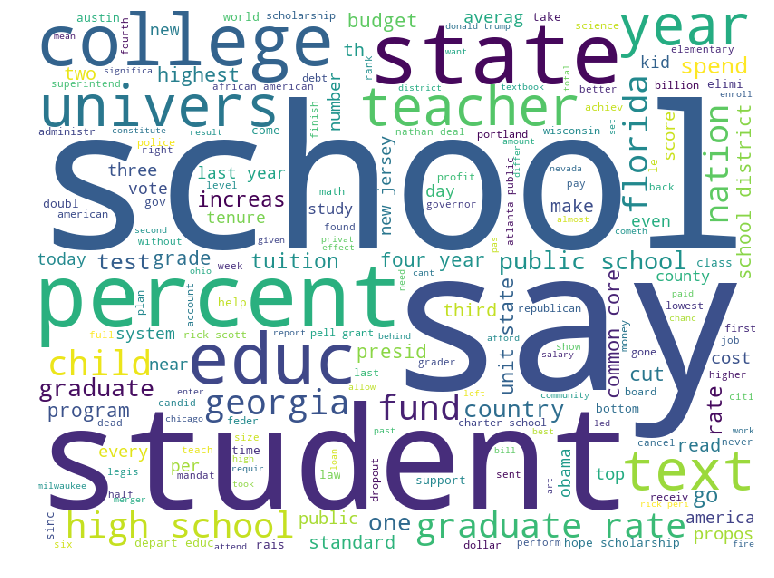

In [18]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(edu_only_train['clean']))

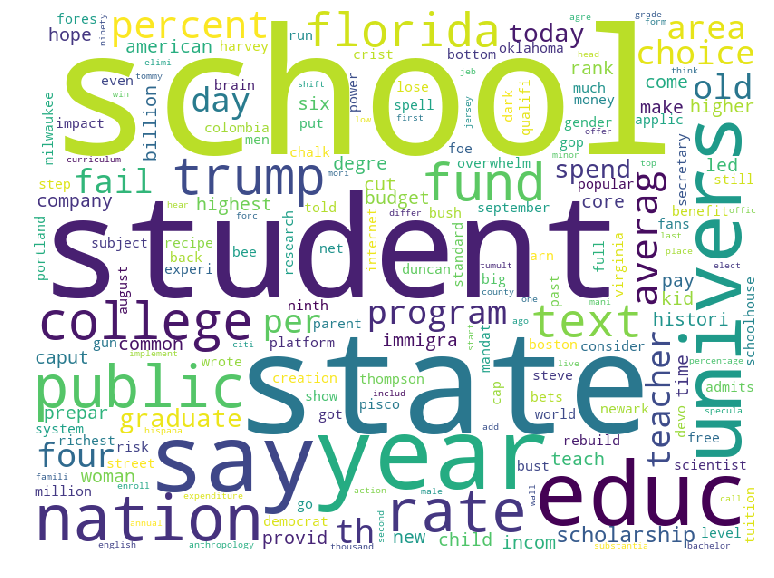

In [19]:
cloud(' '.join(edu_only_test['clean']))

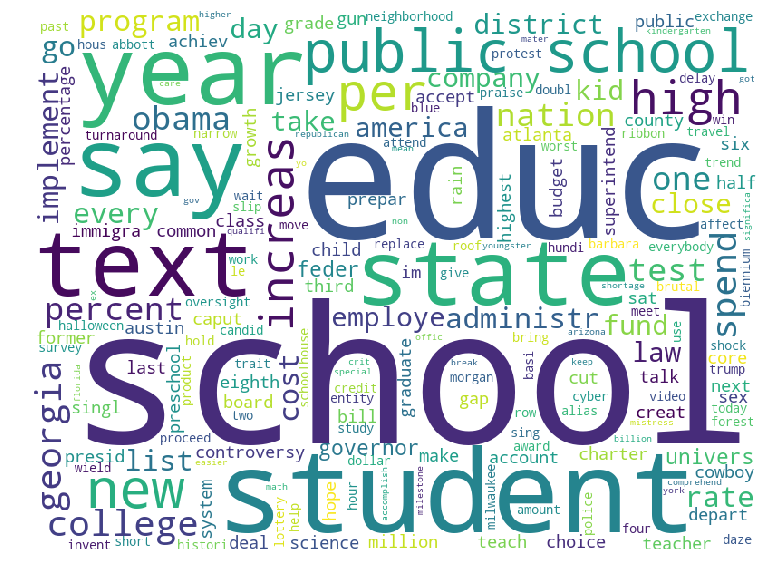

In [20]:
cloud(' '.join(edu_only_valid['clean']))

# Feature 1: Sentiment analysis

Running sentiment analysis using the education enriched data, anf focusing on data that specifically partains to education as the subject. 

In [21]:
edu_only_train['clean'].head()

5      chicago bear start quarterback last year total...
51         magi hassan rais tuition make highest america
97     averag student florida actual pay pocket major...
123    gov rick scott cut cost prepaid college tuitio...
280    sinc college tuition nationwide gone cometh li...
Name: clean, dtype: object

In [22]:
import warnings
import nltk.sentiment
warnings.filterwarnings('ignore')

senti = nltk.sentiment.vader.SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = senti.polarity_scores(sentence)
    print("{:-<40} \n{}".format(sentence, str(snt)))
    
print_sentiment_scores(edu_only_train['clean'][97])

averag student florida actual pay pocket major univers tuition much le spend cellphone 
{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'compound': -0.1027}


/anaconda2/lib/python2.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [23]:
def get_vader_polarity(snt):
    if not snt:
        return None
    elif snt['neg'] > snt['pos'] and snt['neg'] > snt['neu']:
        return -1
    elif snt['pos'] > snt['neg'] and snt['pos'] > snt['neu']:
        return 1
    else:
        return 0

In [24]:
#Function to determine if a text is negative(-1) or postive (1) or neutral (0)
def get_polarity_type(sentence):
    sentimentVector = []
    snt = senti.polarity_scores(sentence)
    sentimentVector.append(get_vader_polarity(snt))
    sentimentVector.append(snt['neg'])
    sentimentVector.append(snt['neu'])
    sentimentVector.append(snt['pos'])
    sentimentVector.append(snt['compound'])
    
    print(sentimentVector)
    return sentimentVector

- senti.polarity_scores is a dictionary
- pos and neg indicates - positive and negative emotions in sentence
- we should be interested in compound score which calculates the final effect

In [25]:
sentiment = []
vader_pol = []
cmp_score = []
for row in edu_only_train['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
edu_only_train['sentiment_vector'] = sentiment
edu_only_train['vader_polarity'] = vader_pol
edu_only_train['sentiment_score'] = cmp_score

[0, 0.335, 0.6, 0.065, -0.7506]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.104, 0.896, 0.0, -0.1027]
[0, 0.208, 0.792, 0.0, -0.2732]
[0, 0.0, 0.8, 0.2, 0.3612]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.412, 0.588, 0.0, -0.3612]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.887, 0.113, 0.5719]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.818, 0.182, 0.4404]
[0, 0.13, 0.87, 0.0, -0.2732]
[0, 0.19, 0.612, 0.197, 0.0516]
[0, 0.0, 0.815, 0.185, 0.3612]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.647, 0.353, 0.6124]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.111, 0.889, 0.0, -0.128]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.576, 0.424, 0.5994]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.264, 0.736, 0.0, -0.6486]
[0, 0.323, 0.677, 0.0, -0.6486]
[0, 0.097, 0.778, 0.125, 0.1779]
[0, 0.0, 0.805, 0.195, 0.4404]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.583, 0.417, 0.6124]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.244, 0.568, 0.188, -0.4588]
[0, 0.0, 0.755, 0.24

In [26]:
edu_only_train.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score
5,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,chicago bear start quarterback last year total...,"[0.335, 0.6, 0.065, -0.7506]",0,-0.7506
51,13210.json,barely-true,"Maggie Hassan raised tuition, making it the hi...",education,national-republican-senatorial-committee,0,0,republican,11.0,5.0,7.0,2.0,5.0,an ad,magi hassan rais tuition make highest america,"[0.0, 1.0, 0.0, 0.0]",0,0.0000
97,7599.json,mostly-true,"The average student in Florida, what they actu...",education,will-weatherford,State Representative,Florida,republican,2.0,3.0,4.0,3.0,0.0,a Board of Governors meeting,averag student florida actual pay pocket major...,"[0.104, 0.896, 0.0, -0.1027]",0,-0.1027
123,9500.json,mostly-true,Gov. Rick Scott cut the cost of prepaid colleg...,education,republican-party-florida,0,0,republican,10.0,6.0,6.0,6.0,4.0,a TV ad,gov rick scott cut cost prepaid college tuitio...,"[0.208, 0.792, 0.0, -0.2732]",0,-0.2732
280,12497.json,true,"Since 1978, college tuition nationwide has gon...",education,scott-walker,Milwaukee County Executive,Wisconsin,republican,26.0,41.0,32.0,40.0,11.0,a radio interview,sinc college tuition nationwide gone cometh li...,"[0.0, 0.8, 0.2, 0.3612]",0,0.3612


In [27]:
edu_only_train['sentiment_score']

5       -0.7506
51       0.0000
97      -0.1027
123     -0.2732
280      0.3612
282      0.0000
299     -0.3612
342      0.0000
355      0.5719
380      0.0000
383      0.0000
387      0.4404
398     -0.2732
402      0.0516
488      0.3612
544      0.0000
554      0.0000
601      0.6124
614      0.0000
623      0.0000
660      0.0000
720      0.0000
726     -0.1280
781      0.0000
822      0.5994
922      0.0000
926     -0.6486
975     -0.6486
1012     0.1779
1030     0.4404
          ...  
9865     0.0772
9911     0.4215
9978     0.2023
10064    0.0000
10084    0.0000
10112    0.0000
10156    0.6597
10240    0.3818
10241    0.0000
10242    0.0000
10243    0.0000
10244   -0.6124
10245    0.0000
10246    0.5859
10247   -0.2500
10248    0.0000
10249    0.4215
10250    0.0000
10251    0.0000
10252   -0.5994
10253    0.5719
10254    0.4019
10255    0.0000
10256    0.5859
10257    0.0000
10258    0.3818
10259    0.0000
10260    0.0000
10261    0.0000
10262   -0.6808
Name: sentiment_score, L

In [28]:
sentiment = []
vader_pol = []
cmp_score = []

for row in edu_only_test['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
edu_only_test['sentiment_vector'] = sentiment
edu_only_test['vader_polarity'] = vader_pol
edu_only_test['sentiment_score'] = cmp_score

[0, 0.0, 0.75, 0.25, 0.4588]
[1, 0.0, 0.412, 0.588, 0.6908]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.241, 0.759, 0.0, -0.3612]
[0, 0.333, 0.667, 0.0, -0.5423]
[0, 0.0, 0.752, 0.248, 0.5106]
[0, 0.174, 0.826, 0.0, -0.2732]
[0, 0.0, 0.948, 0.052, 0.0258]
[0, 0.0, 0.845, 0.155, 0.296]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.212, 0.788, 0.0, -0.5423]
[0, 0.189, 0.811, 0.0, -0.1027]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.252, 0.748, 0.0, -0.4019]
[0, 0.1, 0.813, 0.086, -0.0772]
[1, 0.0, 0.488, 0.512, 0.743]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.755, 0.245, 0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.189, 0.811, 0.0, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.42, 0.58, 0.0, -0.4404]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.

In [29]:
sentiment = []
vader_pol = []
cmp_score = []

for row in edu_only_valid['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
    
edu_only_valid['sentiment_vector'] = sentiment
edu_only_valid['vader_polarity'] = vader_pol
edu_only_valid['sentiment_score'] = cmp_score

[0, 0.0, 0.776, 0.224, 0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.843, 0.157, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.536, 0.464, 0.0, -0.7964]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.785, 0.215, 0.6369]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.369, 0.631, 0.0, -0.6249]
[0, 0.0, 0.763, 0.237, 0.4215]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.208, 0.792, 0.0, -0.2732]
[0, 0.0, 0.769, 0.231, 0.2023]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.304, 0.696, 0.0, -0.5423]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.838, 0.162, 0.4404]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.818, 0.182, 0.4404]
[0, 0.406, 0.594, 0.0, -0.6249]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.698, 0.302, 0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.278, 0.722, 0.0, -0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.294, 0.706, 0.0, -0.3612]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.208, 0.792, 0.0, -0.2732]
[0, 0.0, 0.769,

In [30]:
edu_only_train.to_csv("input_data/train_sentiment.csv", sep=',')
edu_only_test.to_csv("input_data/test_sentiment.csv", sep=',')
edu_only_valid.to_csv("input_data/valid_sentiment.csv", sep=',')

# Feature 2:  LDA Topic Modelling 


In [31]:
edu_only_train['index'] = edu_only_train.index
data = edu_only_train
train_lda = data[['clean', 'index']]
train_lda.head(4)

,clean,index
5,chicago bear start quarterback last year total...,5
51,magi hassan rais tuition make highest america,51
97,averag student florida actual pay pocket major...,97
123,gov rick scott cut cost prepaid college tuitio...,123


In [32]:
edu_only_test['index'] = edu_only_test.index
data = edu_only_test
test_lda = data[['clean', 'index']]
test_lda.head(4)

,clean,index
80,rebuild three high school benefit percent port...,80
124,incom cap recipe popular hope scholarship,124
168,say state mandat test come english company,168
181,pisco county school graduate rate substantia h...,181


In [33]:
edu_only_valid['index'] = edu_only_valid.index
data = edu_only_valid
test_lda = data[['clean', 'index']]
test_lda.head(4)

,clean,index
28,administr employe college universitieshav doub...,28
32,kid take sat state nation mean high percentage...,32
96,presid obama said want everybody america go co...,96
98,result atlanta public school crit test question,98


#### Split the clean news into list of words

In [34]:
processed_docs = train_lda['clean'].map(lambda doc: doc.split(" "))
processed_docs[:4]

5      [chicago, bear, start, quarterback, last, year...
51     [magi, hassan, rais, tuition, make, highest, a...
97     [averag, student, florida, actual, pay, pocket...
123    [gov, rick, scott, cut, cost, prepaid, college...
Name: clean, dtype: object

### Latent Dirichlet Allocation (LDA)

> It is an example of a probabilistic topic model. Topic models are a great way to automatically explore and structure a large set of documents: they group or cluster documents based on the words that occur in them. As documents on similar topics tend to use a similar sub-vocabulary, the resulting clusters of documents can be interpreted as discussing different 'topics'.

In [35]:
def get_word_tokens(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) > 3:
            result.append(token)
    return result
tokenized_docs_local = edu_only_train['clean'].map(get_word_tokens)

### Create a function to build the dictionary and tokenized docs for given feature

Below function does the following
* #### Dictionary
Returns Dictionary given, dataframe and column name
* #### Tokenizeddocs
Returns Tokenizeddocs, of the all the words in a text in that column can be used for bow_corpus
* #### Dictionary is filtered using Gensim filter_extremes
    Filter out tokens that appear in less than 15 documents (absolute number) or more than 0.5 documents (fraction of total corpus size, not absolute number). after the above two steps, keep only the first 100000 most frequent tokens.


In [36]:
def get_dictionary_print_words(dataframe,colname):
    dictionary_gensim = gensim.corpora.Dictionary(processed_docs)
    count = 0
    print('######## DICTIONARY Words and occurences ########')
    for k, v in dictionary_gensim.iteritems():
        print(k, v)
        count += 1
        if count > 10:
            break
    dictionary_gensim.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
    return dictionary_gensim, tokenized_docs_local

#### Gensim filter_extremes

> Filter out tokens that appear less than 15 documents (absolute number) or more than 0.5 documents (fraction of total corpus size, not absolute number). after the above two steps, keep only the first 100000 most frequent tokens.

#### Create a function to build bow_corpus from dictionary and tokenized_docs

In [37]:
def get_bow_corpus_print_sample(dataframe,colname):
    dictionary_gensim, tokenized_docs_local = get_dictionary_print_words(dataframe, colname)
    bow_corpus_local = [dictionary_gensim.doc2bow(doc) for doc in tokenized_docs_local]
    bow_doc_local_0 = bow_corpus_local[0]
    print('\n ######## BOW VECTOR FIRST ITEM ########')
    print(bow_doc_local_0)
    print('\n ######## PREVIEW BOW ########')
    for i in range(len(bow_doc_local_0)):
        print("Word {} (\"{}\") appears {} time.".format(bow_doc_local_0[i][0], 
                                               dictionary_gensim[bow_doc_local_0[i][0]], bow_doc_local_0[i][1]))
    return bow_corpus_local, dictionary_gensim

**Gensim doc2bow**

For each document we create a dictionary reporting how many words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier

#### Create a function to build tfidf_corpus from bow_corpus

Create tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, then apply transformation to the entire corpus and call it ‘corpus_tfidf’. Finally we preview TF-IDF scores for our first document.

In [38]:
def get_tfidf_corpus_print_sample(bow_corpus_local):
    from gensim import corpora, models
    tfidf = models.TfidfModel(bow_corpus_local)
    tfidf_corpus_local = tfidf[bow_corpus_local]
    print('\n ######## TFIDF VECTOR FIRST ITEM ########')
    
    from pprint import pprint
    for doc in tfidf_corpus_local:
        pprint(doc)
        break
    return tfidf_corpus_local

#### Create a function to run ldamodel and print top 10 topics

In [39]:
def get_lda_model_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model

#### Create a function to run ldamodel and print top 10 topics


In [40]:
def get_lda_model_topics_topwords_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2, random_state=1)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model,lda_topics_words

#### Create a function to enrich data with lda topics, lda topics score, top words

In [41]:
def identify_topic_number_score_label_topwords(text,dictionary_local,lda_model_local,lda_topics_top_words_local):
    bow_vector_local = dictionary_local.doc2bow(get_word_tokens(text))
    topic_number_local, topic_score_local = sorted(
        lda_model_local[bow_vector_local], key=lambda tup: -1*tup[1])[0]
    #print (topic_number_local, topic_score_local)
    return pd.Series([topic_number_local, topic_score_local," ".join(lda_topics_top_words_local[int(topic_number_local)][1])])

#### Create a function that can enrich topic data to dataframe

In [42]:
def update_lda_results_to_dataset(dataframe,topiccolnames,coltoapplylda,colnamedictionary,colnameldamodel, colnameldatopwords):
    dataframe[topiccolnames] = dataframe.apply(
    lambda row: identify_topic_number_score_label_topwords(
        row[coltoapplylda],colnamedictionary,colnameldamodel,
        colnameldatopwords), axis=1)
    return dataframe

### Bag of Words

#### Create a dictionary and tokens

> Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.

#### Create a function to convert text to word tokens from cleaned dataset

In [43]:
bow_corpus_headline, dictionary_headline = get_bow_corpus_print_sample(edu_only_train,
                                                                      'clean')


######## DICTIONARY Words and occurences ########
(356, u'essay')
(375, u'revoke')
(276, u'consum')
(193, u'dollar')
(274, u'madison')
(861, u'invent')
(547, u'month')
(42, u'four')
(658, u'supplement')
(701, u'luxembourg')
(129, u'go')

 ######## BOW VECTOR FIRST ITEM ########
[(0, 1)]

 ######## PREVIEW BOW ########
Word 0 ("year") appears 1 time.


### Running LDA using Bag of Words
Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

In [44]:
lda_model_headline, lda_headline_topic_words = get_lda_model_topics_topwords_print_top_topics(
    bow_corpus_headline, 10 ,dictionary_headline)

0::[u'school', u'college', u'year', u'student', u'graduate', u'percent', u'high', u'state', u'public', u'rate']
1::[u'state', u'student', u'georgia', u'school', u'college', u'teacher', u'univers', u'percent', u'child', u'high']
2::[u'florida', u'graduate', u'student', u'educ', u'college', u'school', u'rate', u'univers', u'state', u'year']
3::[u'rate', u'percent', u'graduate', u'student', u'year', u'nation', u'georgia', u'teacher', u'school', u'educ']
4::[u'student', u'school', u'nation', u'florida', u'fund', u'state', u'text', u'educ', u'college', u'year']
5::[u'educ', u'univers', u'text', u'state', u'public', u'year', u'percent', u'school', u'child', u'fund']
6::[u'school', u'teacher', u'public', u'state', u'percent', u'nation', u'florida', u'high', u'child', u'student']
7::[u'state', u'fund', u'educ', u'florida', u'text', u'nation', u'year', u'school', u'student', u'college']
8::[u'college', u'rate', u'educ', u'year', u'student', u'teacher', u'school', u'percent', u'nation', u'public

In [45]:
lda_model_headline.top_topics(bow_corpus_headline)

[([(0.42971525, u'school'),
   (0.10733017, u'teacher'),
   (0.10310891, u'public'),
   (0.10243084, u'state'),
   (0.075504795, u'percent'),
   (0.052690309, u'nation'),
   (0.030183354, u'florida'),
   (0.02128881, u'high'),
   (0.021287601, u'child'),
   (0.010397249, u'student'),
   (0.0090941302, u'year'),
   (0.0072229644, u'educ'),
   (0.0061016208, u'rate'),
   (0.0054741595, u'fund'),
   (0.0039094486, u'georgia'),
   (0.0037083209, u'univers'),
   (0.0034959791, u'text'),
   (0.0034958175, u'graduate'),
   (0.00089124718, u'college'),
   (0.00088967249, u'one')],
  -7.0472684827412886),
 ([(0.27606893, u'text'),
   (0.23551708, u'school'),
   (0.14944065, u'child'),
   (0.085744604, u'univers'),
   (0.047960758, u'student'),
   (0.04432746, u'rate'),
   (0.043499295, u'teacher'),
   (0.041148707, u'high'),
   (0.027012188, u'graduate'),
   (0.0090436004, u'college'),
   (0.0088503286, u'public'),
   (0.008849849, u'nation'),
   (0.0022564505, u'state'),
   (0.0022551701, u'ed

#### Generate TF-IDF bow_corpus
Create tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, then apply transformation to the entire corpus and call it ‘corpus_tfidf’. Finally we preview TF-IDF scores for our first document.

In [46]:
tfidf_corpus_headline = get_tfidf_corpus_print_sample(bow_corpus_headline)


 ######## TFIDF VECTOR FIRST ITEM ########
[(0, 1.0)]


### Running LDA model using Bag of Words
Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

**GOAL**: To get top ten topics with top words. 

In [47]:
lda_tfidf_model_headline  = get_lda_model_print_top_topics(tfidf_corpus_headline,10,dictionary_headline)

0::[u'georgia', u'educ', u'college', u'state', u'teacher', u'text', u'student', u'school', u'public', u'percent']
1::[u'college', u'text', u'graduate', u'student', u'rate', u'florida', u'school', u'univers', u'high', u'georgia']
2::[u'school', u'percent', u'high', u'nation', u'student', u'state', u'graduate', u'rate', u'fund', u'educ']
3::[u'educ', u'teacher', u'text', u'percent', u'fund', u'school', u'student', u'state', u'college', u'child']
4::[u'rate', u'graduate', u'student', u'school', u'high', u'nation', u'text', u'univers', u'educ', u'public']
5::[u'teacher', u'percent', u'state', u'college', u'public', u'school', u'student', u'nation', u'rate', u'year']
6::[u'child', u'univers', u'state', u'school', u'nation', u'graduate', u'student', u'public', u'year', u'rate']
7::[u'school', u'state', u'florida', u'student', u'high', u'public', u'child', u'univers', u'georgia', u'percent']
8::[u'fund', u'teacher', u'public', u'year', u'educ', u'school', u'text', u'state', u'percent', u'chil

In [48]:
lda_tfidf_model_headline.get_topics()[0]

array([ 0.02077886,  0.00934027,  0.03993154,  0.00745036,  0.10520085,
        0.01368117,  0.03990282,  0.24365443,  0.00252451,  0.04162316,
        0.00538259,  0.09083427,  0.04130116,  0.00252676,  0.03163023,
        0.00252641,  0.25555724,  0.00252451,  0.03269389,  0.00252537,
        0.00588511,  0.00252451], dtype=float32)

In [49]:
lda_tfidf_model_headline.print_topics()[0][1]

u'0.256*"georgia" + 0.244*"educ" + 0.105*"college" + 0.091*"state" + 0.042*"teacher" + 0.041*"text" + 0.040*"student" + 0.040*"school" + 0.033*"public" + 0.032*"percent"'

### Semisupervised Labeling
Based on train,test and valid data explored the topic scores for sample data and identified below topics

In [50]:
semisupervised_topic_labels = ['topic0','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9']

####  Function to add topicnumber, topicscore, topiclabel, topwords

In [51]:
headlinetopiccolnames = ['topic_number','lda_score','topic_top_words']
edu_only_train = update_lda_results_to_dataset(
    edu_only_train, headlinetopiccolnames,'clean', dictionary_headline, lda_model_headline, lda_headline_topic_words)
edu_only_train.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,...,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score,index,topic_number,lda_score,topic_top_words
5,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,...,1.0,a an online opinion-piece,chicago bear start quarterback last year total...,"[0.335, 0.6, 0.065, -0.7506]",0,-0.7506,5,0,0.549966,school college year student graduate percent h...
51,13210.json,barely-true,"Maggie Hassan raised tuition, making it the hi...",education,national-republican-senatorial-committee,0,0,republican,11.0,5.0,...,5.0,an ad,magi hassan rais tuition make highest america,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,51,0,0.100000,school college year student graduate percent h...
97,7599.json,mostly-true,"The average student in Florida, what they actu...",education,will-weatherford,State Representative,Florida,republican,2.0,3.0,...,0.0,a Board of Governors meeting,averag student florida actual pay pocket major...,"[0.104, 0.896, 0.0, -0.1027]",0,-0.1027,97,2,0.774943,florida graduate student educ college school r...
123,9500.json,mostly-true,Gov. Rick Scott cut the cost of prepaid colleg...,education,republican-party-florida,0,0,republican,10.0,6.0,...,4.0,a TV ad,gov rick scott cut cost prepaid college tuitio...,"[0.208, 0.792, 0.0, -0.2732]",0,-0.2732,123,8,0.549977,college rate educ year student teacher school ...
280,12497.json,true,"Since 1978, college tuition nationwide has gon...",education,scott-walker,Milwaukee County Executive,Wisconsin,republican,26.0,41.0,...,11.0,a radio interview,sinc college tuition nationwide gone cometh li...,"[0.0, 0.8, 0.2, 0.3612]",0,0.3612,280,8,0.699974,college rate educ year student teacher school ...


In [52]:
edu_only_test = update_lda_results_to_dataset(
    edu_only_test,headlinetopiccolnames,'clean',
  dictionary_headline,lda_model_headline,lda_headline_topic_words)
edu_only_test.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,...,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score,index,topic_number,lda_score,topic_top_words
80,2854.json,pants-fire,Rebuilding three high schools will benefit 40 ...,education,carole-smith,Portland schools superintendent,Oregon,none,0.0,0.0,...,1.0,a press briefing,rebuild three high school benefit percent port...,"[0.0, 0.75, 0.25, 0.4588]",0,0.4588,80,0,0.690207,school college year student graduate percent h...
124,10147.json,false,On an income cap for recipients of the popular...,education,jason-carter,State Senator,Georgia,democrat,1.0,0.0,...,0.0,forum,incom cap recipe popular hope scholarship,"[0.0, 0.412, 0.588, 0.6908]",1,0.6908,124,0,0.100000,school college year student graduate percent h...
168,7744.json,mostly-true,Says states mandated tests come from an Englis...,education,george-lavender,State representative,Texas,republican,0.0,0.0,...,0.0,in Texas House of Representatives debate,say state mandat test come english company,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,168,7,0.549965,state fund educ florida text nation year schoo...
181,5470.json,true,Pasco County schools have graduation rates sub...,education,heather-fiorentino,superintendent of Pasco County's public schools,Florida,republican,0.0,0.0,...,1.0,a press release,pisco county school graduate rate substantia h...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,181,3,0.441556,rate percent graduate student year nation geor...
187,8320.json,mostly-true,Today many Florida teachers are at risk of hav...,education,charlie-crist,0,Florida,democrat,15.0,9.0,...,2.0,a Tampa Bay Times op-ed,today mani florida teacher risk pay impact per...,"[0.241, 0.759, 0.0, -0.3612]",0,-0.3612,187,9,0.512557,text school child univers student rate teacher...


In [53]:
edu_only_valid = update_lda_results_to_dataset(
    edu_only_valid,headlinetopiccolnames,'clean',
  dictionary_headline,lda_model_headline,lda_headline_topic_words)
edu_only_valid.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,...,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score,index,topic_number,lda_score,topic_top_words
28,10376.json,mostly-true,Administrative employees at colleges and unive...,education,marco-rubio,U.S. Senator,Florida,republican,33.0,24.0,...,5.0,a book,administr employe college universitieshav doub...,"[0.0, 0.776, 0.224, 0.3818]",0,0.3818,28,0,0.774963,school college year student graduate percent h...
32,2083.json,barely-true,We have more kids take the SAT than any other ...,education,rick-perry,Governor,Texas,republican,30.0,30.0,...,18.0,an interview with CNBC,kid take sat state nation mean high percentage...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,32,0,0.317436,school college year student graduate percent h...
96,5434.json,false,President Obama once said he wants everybody i...,education,rick-santorum,0,Pennsylvania,republican,12.0,16.0,...,5.0,"a speech in Troy, Mich.",presid obama said want everybody america go co...,"[0.0, 0.843, 0.157, 0.0772]",0,0.0772,96,8,0.549972,college rate educ year student teacher school ...
98,4313.json,pants-fire,The results of Atlanta Public Schools 2010 and...,education,beverly-hall,0,0,none,0.0,2.0,...,1.0,a commentary published in Education Week,result atlanta public school crit test question,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,98,6,0.699981,school teacher public state percent nation flo...
100,10614.json,barely-true,The delay inschool testingwas not that of a ve...,education,h-marlene-otoole,state representative,Florida,republican,1.0,0.0,...,0.0,House Education Appropriations Committee Hearing,delay school testing vendor problem test mater...,"[0.536, 0.464, 0.0, -0.7964]",-1,-0.7964,100,6,0.549955,school teacher public state percent nation flo...


### Visualize the LDA Distribution of news against Top 10 Topics

**GOAL 1:** *Each of the N documents will be represented in the LDA model by a vector of length M*
**GOAL 2:** *Each of the M topics is represented by a vector of length V*

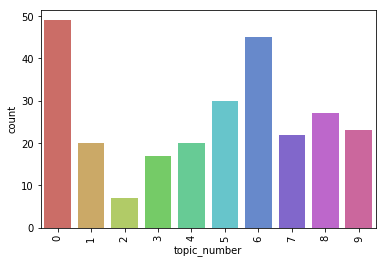

In [54]:
import seaborn as sb
def create_distribution(dataFile):
    g = sb.countplot(x='topic_number', data=dataFile, palette='hls')
    g.set_xticklabels(g.get_xticklabels(),rotation=90)

    return g

create_distribution(edu_only_train) # TRAIN Document Vector

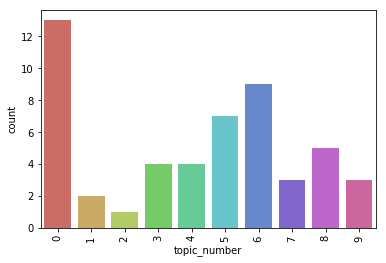

In [55]:
create_distribution(edu_only_test) # TRAIN Document Vector

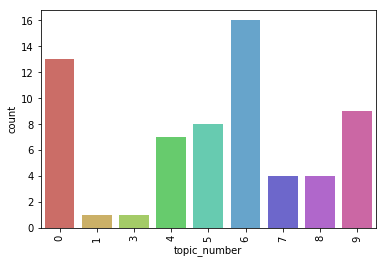

In [56]:
create_distribution(edu_only_valid) # TRAIN Document Vector

##### Saved the latest dataset into a seperate CSV file 

In [57]:
edu_only_train.to_csv("input_data/train_lda.csv", sep=',')
edu_only_test.to_csv("input_data/test_lda.csv", sep=',')
edu_only_valid.to_csv("input_data/valid_lda.csv", sep=',')

# Feature 3:  Sensational Feature Analysis

#### [Sensational Words Corpus](https://www.thepersuasionrevolution.com/380-high-emotion-persuasive-words/)

>  Words aren’t just strings of alphabets sewn together with ink. Words are cues. Words are triggers. Words when used correctly can transform an “eh whatever” into “wow that’s it!”. Words can make you go from literally ROFL to fuming with fury to an uncontrollable-urge-to-take-action-NOW-or-the-earth-may-stop-swinging -on-its-axis.

> Highly emotional words are capable capable of transforming an absolute no into almost yes and a “perhaps” into “for sure”!

Words that are used:
- When you are trying to sell people a solution
- When you are trying to get them to take an action (like, share, subscribe, buy)
- When you are trying to get people to click and read your article
- When you are trying to get someone to agree with you

**There are 1400+ words that are both positive and negative emotions that will help to predict the sensational score for an article**

> I have used these words to perform cosin similarity and predict the sensational similarity score for each news in the give dataset.

In [58]:
corpus = []
for i in edu_only_train['clean']:
    corpus.append(i)
# corpus

sensational_corpus=[]
sensational_words = pd.read_csv('input_data/sensational_words/sensational_words_dict.csv', sep="\t+", header=None, usecols=[0] )
print(len(sensational_words))
sensational_dictionary = ' '.join(sensational_words[0].astype(str))
sensational_corpus.append(sensational_dictionary)



1443


## TF-IDF and Cosine Similarity

#### TF-IDF

> TF-IDF (Term Frequency - Inverse Document Frequency) can be represented tf(d,t) X idf(t). TF-IDF uses the method diminishing the weight (importance) of words appeared in many documents in common, considered them incapable of discerning the documents, rather than simply counting the frequency of words as CountVectorizer does. The outcome matrix consists of each document (row) and each word (column) and the importance (weight) computed by tf * idf (values of the matrix)

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfVec = TfidfVectorizer(max_features=1000)
corpus = []
for i in edu_only_train['clean']:
    corpus.append(i)

tfidf_corpus = tfidfVec.fit_transform(corpus)
tf_idf_senti = tfidfVec.fit_transform(sensational_corpus)
words = tfidfVec.get_feature_names()



In [60]:
tfidf_corpus.toarray()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [61]:
tf_idf_senti.toarray()

array([[ 0.02297788,  0.02297788,  0.02297788,  0.04595577,  0.02297788,
         0.02297788,  0.02297788,  0.02297788,  0.02297788,  0.02297788,
         0.02297788,  0.02297788,  0.02297788,  0.04595577,  0.02297788,
         0.02297788,  0.02297788,  0.04595577,  0.02297788,  0.02297788,
         0.02297788,  0.02297788,  0.02297788,  0.02297788,  0.02297788,
         0.02297788,  0.02297788,  0.02297788,  0.02297788,  0.02297788,
         0.02297788,  0.02297788,  0.02297788,  0.02297788,  0.02297788,
         0.02297788,  0.02297788,  0.02297788,  0.04595577,  0.02297788,
         0.02297788,  0.02297788,  0.02297788,  0.02297788,  0.02297788,
         0.02297788,  0.02297788,  0.02297788,  0.02297788,  0.02297788,
         0.02297788,  0.02297788,  0.02297788,  0.02297788,  0.02297788,
         0.04595577,  0.02297788,  0.02297788,  0.02297788,  0.02297788,
         0.02297788,  0.02297788,  0.02297788,  0.02297788,  0.02297788,
         0.02297788,  0.02297788,  0.04595577,  0.0

In [62]:
tfidfVec.vocabulary_

{u'all': 36,
 u'chinese': 148,
 u'forbidden': 333,
 u'dynamic': 294,
 u'foul': 336,
 u'deadline': 230,
 u'controversial': 193,
 u'talks': 836,
 u'appetite': 63,
 u'research': 604,
 u'dreadful': 288,
 u'unfeeling': 925,
 u'stinky': 782,
 u'sparkling': 756,
 u'anaphia': 47,
 u'revengeful': 620,
 u'tingle': 868,
 u'rankle': 577,
 u'under': 921,
 u'pongy': 526,
 u'worth': 992,
 u'risk': 626,
 u'confidential': 180,
 u'dollar': 281,
 u'ticked': 866,
 u'carefree': 125,
 u'tantalizing': 838,
 u'yellow': 997,
 u'screaming': 667,
 u'courageous': 200,
 u'elated': 311,
 u'school': 661,
 u'needlefelt': 418,
 u'stimulus': 779,
 u'companies': 170,
 u'acerb': 7,
 u'wantonness': 969,
 u'deplorable': 250,
 u'triumph': 895,
 u'force': 334,
 u'cooperative': 195,
 u'tired': 869,
 u'budget': 116,
 u'conniption': 182,
 u'investment': 353,
 u'tactile': 829,
 u'what': 978,
 u'deliberate': 245,
 u'ruthless': 637,
 u'poisonous': 519,
 u'poison': 518,
 u'crush': 219,
 u'above': 2,
 u'dysosmia': 295,
 u'sentient':

In [63]:
train_tfidf = tfidfVec.fit_transform(edu_only_train['clean'])
print('Training dim:', train_tfidf.shape)
print(train_tfidf.A[:10])


test_tfidf = tfidfVec.fit_transform(edu_only_test['clean'])
print('Test dim:', test_tfidf.shape)
print(test_tfidf.A[:10])


valid_tfidf = tfidfVec.fit_transform(edu_only_valid['clean'])
print('Valid dim:', valid_tfidf.shape)
print(valid_tfidf.A[:10])

('Training dim:', (260, 874))
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
('Test dim:', (51, 277))
[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.29399125  0.         ...,  0.          0.          0.        ]]
('Valid dim:', (63, 370))
[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0. 


#### Cosine Similarity Score

> The cosine similarity between two vectors (or two documents on the Vector Space) is a measure that calculates the cosine of the angle between them. This metric is a measurement of orientation and not magnitude, it can be seen as a comparison between documents on a normalized space because we’re not taking into the consideration only the magnitude of each word count (tf-idf) of each document, but the angle between the documents.

> I have compared the sentiment vector of each doucment and estimated a similarity score which is saved as a column in the training and test dataset. 

In [65]:
'''# from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial
similarity_score = []
for i in range(len(train_tfidf.toarray())):
    similarity_score.append(1 - spatial.distance.cosine(tf_idf_senti[0].toarray(), tfidf_corpus[i].toarray()))
'''

'# from sklearn.metrics.pairwise import cosine_similarity\nfrom scipy import spatial\nsimilarity_score = []\nfor i in range(len(train_tfidf.toarray())):\n    similarity_score.append(1 - spatial.distance.cosine(tf_idf_senti[0].toarray(), tfidf_corpus[i].toarray()))\n'

# Feature 4: Political Affiliation Model 

In [66]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics
import numpy as np
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
#from sklearn.cross_validation import KFold
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
import itertools

class PartyAffiliation():
    
    # API to check whether the subject(Headline) is present in the 
    # - democrats most used words if the party affiliation is democrat
    # - republicans most used words if the part affiliation is republican
    def partyAffiliationFromHeadline(self, r):
        v = r['subject_str']
        p = r['party_str']
        if (p =='democrat'):
            s2 = set(self.countDemV.get_feature_names())
        if (p =='republican'):
            s2 = set(self.countRepV.get_feature_names())
        if (p != 'democract' and p !='republican'):
            return 1 #'true'        
        if set(v).intersection(s2):
            return 1 #'true'
        else:
            return 0 #'false'

    #API to convert true, mostly-true and half-true to true
    # false, barely-true and pants-fire to false
    def convertMulticlassToBinaryclass(self, r):
        v = r['label']
        if (v == 'true'):
            return 1 #'true'
        if (v == 'mostly-true'):
            return 1 #'true'
        if (v == 'half-true'):
            return 1 #'true'
        if (v == 'barely-true'):
            return 0 #'false'
        if (v == 'false'):
            return 0 #'false'
        if (v == 'pants-fire'):
            return 0 #'false'
            
            
            
    def plot_confusion_matrix(self, cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')       
            
    
    def __init__(self):        

        columnNamesPar = ["id", "label", "statement", "subject", "speaker", "speaker_job_title", "state_info", "party_affiliation", "barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context"]
        dataTrainPar = pd.read_csv('input_data/dataset/train_education_enrich.tsv', sep='\t', header=None, names = columnNamesPar)
        dataValidatePar = pd.read_csv('input_data/dataset/valid_education_enrich.tsv', sep='\t', header=None, names = columnNamesPar)
        dataTestPar = pd.read_csv('input_data/dataset/test_education_enrich.tsv', sep='\t', header=None, names = columnNamesPar)
        
    
        # Remove unwanted columns in the dataset
        columnsToRemovePar = ['id', 'speaker', 'context','speaker_job_title', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts']
        dataTrainPar = dataTrainPar.drop(columns=columnsToRemovePar)
        dataValidatePar = dataValidatePar.drop(columns=columnsToRemovePar)
        dataTestPar = dataTestPar.drop(columns=columnsToRemovePar)
        
        # convert the labels to true and false only
        dataTrainPar['label'] = dataTrainPar.apply(self.convertMulticlassToBinaryclass, axis=1)
        dataValidatePar['label'] = dataValidatePar.apply(self.convertMulticlassToBinaryclass, axis=1)
        dataTestPar['label'] = dataTestPar.apply(self.convertMulticlassToBinaryclass, axis=1)
        
        # display all the party affiliations and show the count of each party 
#         dataTrainPar.groupby('party_affiliation').count()[['state_info']].rename(
#         columns={'state_info': 'count'}).sort_values(
#         'count', ascending=False).reset_index().plot.bar(
#         x='party_affiliation', y='count', figsize=(16, 10), fontsize=18);
        
        # As we are considering only democrat, republican and none (top 3 party affiliations),
        # ignoring other party affiliations
        rowsToRemove = ['Moderate', 'activist', 'business-leader', 'columnist', 'constitution-party', 'democratic-farmer-labor', 'education-official', 'government-body', 'green', 'independent', 'journalist', 'labor-leader', 'liberal-party-canada', 'libertarian', 'nan', 'newsmaker', 'ocean-state-tea-party-action', 'organization', 'state-official', 'talk-show-host', 'tea-party-member']

        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'Moderate']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'activist']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'business-leader']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'columnist']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'constitution-party']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'democratic-farmer-labor']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'education-official']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'government-body']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'green']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'independent']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'journalist']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'labor-leader']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'liberal-party-canada']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'libertarian']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'nan']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'newsmaker']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'ocean-state-tea-party-action']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'organization']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'state-official']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'talk-show-host']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'tea-party-member']

        # As we are considering only democrat, republican and none (top 3 party affiliations),
        # ignoring other party affiliations

        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'Moderate']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'activist']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'business-leader']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'columnist']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'constitution-party']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'democratic-farmer-labor']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'education-official']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'government-body']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'green']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'independent']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'journalist']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'labor-leader']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'liberal-party-canada']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'libertarian']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'nan']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'newsmaker']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'ocean-state-tea-party-action']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'organization']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'state-official']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'talk-show-host']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'tea-party-member']

        
        dataTrainPar['party_str'] = dataTrainPar['party_affiliation'].astype(str)
        dataTestPar['party_str'] = dataTestPar['party_affiliation'].astype(str)
        

        #predicting truth level
#        dataTrainPar.groupby('label').count()[['party_affiliation']].reset_index().plot.bar(x='label', y='party_affiliation')
        
        # get the most used democrat words
        self.countDemV = CountVectorizer(stop_words='english', min_df=40, max_df=80, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')

        dataTrainDem= dataTrainPar
        dataTrainDem = dataTrainPar.loc[dataTrainPar['party_str'] == 'democrat']
        dem_count = self.countDemV.fit_transform(dataTrainDem['statement'].values)
        
        #get the republican most used words
        
        self.countRepV = CountVectorizer(stop_words='english', min_df=20, max_df=40, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')
        dataTrainRep= dataTrainPar
        dataTrainRep = dataTrainPar.loc[dataTrainPar['party_str'] == 'republican']
        rep_count = self.countRepV.fit_transform(dataTrainRep['statement'].values)

        dataTestDem= dataTestPar
        dataTestDem = dataTestPar.loc[dataTestPar['party_str'] == 'democrat']
        
        dataTrainPar['subject_str'] = dataTrainPar['subject'].astype(str).str.split() 
        dataTrainPar['label_str'] = dataTrainPar.apply(self.partyAffiliationFromHeadline, axis=1)

        dataTestPar['subject_str'] = dataTestPar['subject'].astype(str).str.split() 
        dataTestPar['label_str'] = dataTestPar.apply(self.partyAffiliationFromHeadline, axis=1)

        dataTrainDem['subject_str'] = dataTrainDem['subject'].astype(str).str.split() 
        dataTrainDem['label_str'] = dataTrainDem.apply(self.partyAffiliationFromHeadline, axis=1)
    
        dataTestDem['subject_str'] = dataTestDem['subject'].astype(str).str.split() 
        dataTestDem['label_str'] = dataTestDem.apply(self.partyAffiliationFromHeadline, axis=1)
        
        
        self.model = LogisticRegression()
        self.model = self.model.fit(dataTrainPar['label_str'].values.reshape(-1, 1), dataTrainPar['label'].values)
        predicted_LogR = self.model.predict(dataTestPar['label_str'].values.reshape(-1, 1))
        score = metrics.accuracy_score(dataTestPar['label'], predicted_LogR)
        print("Party Affiliation Model Trained - accuracy:   %0.6f" % score)

    
    def predict(self, headline, party):
                
        #creating the dataframe with our text so we can leverage the existing code
        dfrme = pd.DataFrame(index=[0], columns=['subject', 'party_str'])
        dfrme['subject_str'] = headline
        dfrme['party_str'] = party        

        dfrme['subject'] = headline
        dfrme['subject_str'] = dfrme['subject'].astype(str).str.split() 
        dfrme['label_str'] = dfrme.apply(self.partyAffiliationFromHeadline, axis=1)
        
        x = dfrme['label_str'].values.reshape(-1, 1)
        predicted = self.model.predict(x)
        predicedProb = self.model.predict_proba(x)[:,1]
        return predicted, predicedProb
                    
    
##testing code
f = PartyAffiliation()
#pf.predict("Says the Annies List political group supports third-trimester abortions on demand", "republican")

Party Affiliation Model Trained - accuracy:   0.562603


In [67]:
# from ipynb.fs.full.m_partyaffiliation import PartyAffiliation
partyAffiliation = PartyAffiliation()

Party Affiliation Model Trained - accuracy:   0.562603


In [68]:
def DATAMINERS_getPartyAffiliationScore(headline, partyName): # return between 0 and 1, being 0 = True,  1 = Fake
    if ( (headline == "") | (partyName == "") ):
        return 0
    binaryValue, probValue = partyAffiliation.predict(headline, partyName)
    return (1 - float(probValue))

print(DATAMINERS_getPartyAffiliationScore("Says the Annies List political group supports third-trimester abortions on demand", "republican"))

0.396514602499


# Feature 5: Click Bait 

Enriched the current clickbait dataset with an additional 3M headlines that are from the enquirer.com who is known for their catchy(clickbait) headlines. I also built random forest classifier and that model has an improved accuracy over the original logistic regression classifier by 4%. I also tried to apply linear regression to the data and found that the that was a poor predictor of whether or not something is click bait. I found that the best model is a random forest model. 

In [69]:
class ClickbaitNewData():
    
    question_words = ['who', 'whos', 'whose', 'what', 'whats', 'whatre', 'when', 'whenre', 'whens', 'couldnt',
            'where', 'wheres', 'whered', 'why', 'whys', 'can', 'cant', 'could', 'will', 'would', 'is',
            'isnt', 'should', 'shouldnt', 'you', 'your', 'youre', 'youll', 'youd', 'here', 'heres',
            'how', 'hows', 'howd', 'this', 'are', 'arent', 'which', 'does', 'doesnt']

    contractions = ['tis', 'aint', 'amnt', 'arent', 'cant', 'couldve', 'couldnt', 'couldntve',
                    'didnt', 'doesnt', 'dont', 'gonna', 'gotta', 'hadnt', 'hadntve', 'hasnt',
                    'havent', 'hed', 'hednt', 'hedve', 'hell', 'hes', 'hesnt', 'howd', 'howll',
                    'hows', 'id', 'idnt', 'idntve', 'idve', 'ill', 'im', 'ive', 'ivent', 'isnt',
                    'itd', 'itdnt', 'itdntve', 'itdve', 'itll', 'its', 'itsnt', 'mightnt',
                    'mightve', 'mustnt', 'mustntve', 'mustve', 'neednt', 'oclock', 'ol', 'oughtnt',
                    'shant', 'shed', 'shednt', 'shedntve', 'shedve', 'shell', 'shes', 'shouldve',
                    'shouldnt', 'shouldntve', 'somebodydve', 'somebodydntve', 'somebodys',
                    'someoned', 'someonednt', 'someonedntve', 'someonedve', 'someonell', 'someones',
                    'somethingd', 'somethingdnt', 'somethingdntve', 'somethingdve', 'somethingll',
                    'somethings', 'thatll', 'thats', 'thatd', 'thered', 'therednt', 'theredntve',
                    'theredve', 'therere', 'theres', 'theyd', 'theydnt', 'theydntve', 'theydve',
                    'theydvent', 'theyll', 'theyontve', 'theyre', 'theyve', 'theyvent', 'wasnt',
                    'wed', 'wedve', 'wednt', 'wedntve', 'well', 'wontve', 'were', 'weve', 'werent',
                    'whatd', 'whatll', 'whatre', 'whats', 'whatve', 'whens', 'whered', 'wheres',
                    'whereve', 'whod', 'whodve', 'wholl', 'whore', 'whos', 'whove', 'whyd', 'whyre',
                    'whys', 'wont', 'wontve', 'wouldve', 'wouldnt', 'wouldntve', 'yall', 'yalldve',
                    'yalldntve', 'yallll', 'yallont', 'yallllve', 'yallre', 'yallllvent', 'yaint',
                    'youd', 'youdve', 'youll', 'youre', 'yourent', 'youve', 'youvent']
    
    def process_text(self, text):
        result = text.replace('/', '').replace('\n', '')
        result = re.sub(r'[1-9]+', 'number', result)
        result = re.sub(r'(\w)(\1{2,})', r'\1', result)
        result = re.sub(r'(?x)\b(?=\w*\d)\w+\s*', '', result)
        result = ''.join(t for t in result if t not in punctuation)
        result = re.sub(r' +', ' ', result).lower().strip()
        return result
    
    def cnt_stop_words(self, text):
        s = text.split()
        num = len([word for word in s if word in self.stop])
        return num

    def num_contract(self, text):
        s = text.split()
        num = len([word for word in s if word in self.contractions])
        return num

    def question_word(self, text):
        s = text.split()
        if s[0] in self.question_words:
            return 1
        else:
            return 0

    def part_of_speech(self, text):
        s = text.split()
        nonstop = [word for word in s if word not in self.stop]
        pos = [part[1] for part in nltk.pos_tag(nonstop)]
        pos = ' '.join(pos)
        return pos


    def __init__(self):        
        df_ycb = pd.read_csv('input_data/clickbait/examiner-date-text.txt', sep="\n", header=None, names=['text'])
        df_ycb['clickbait'] = 1

        df_ncb = pd.read_csv('input_data/clickbait/non_clickbait_data.txt', sep="\n", header=None, names=['text'])
        df_ncb['clickbait'] = 0

        df = df_ycb.append(df_ncb, ignore_index=True).reset_index(drop=True)

        

       
        self.stop = stopwords.words('english')
       
        # Creating some latent variables from the data
        df['text']     = df['text'].apply(self.process_text)
        df['question'] = df['text'].apply(self.question_word)

        df['num_words']       = df['text'].apply(lambda x: len(x.split()))
        df['part_speech']     = df['text'].apply(self.part_of_speech)
        df['num_contract']    = df['text'].apply(self.num_contract)
        df['num_stop_words']  = df['text'].apply(self.cnt_stop_words)
        df['stop_word_ratio'] = df['num_stop_words']/df['num_words']
        df['contract_ratio']  = df['num_contract']/df['num_words']

        # Data visualization functions
        figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

        plot = df.groupby('question')['clickbait'].value_counts().unstack().plot.bar(ax=axes[0,0], rot=0)
        plot.set_xlabel('Headline Question')
        plot.set_ylabel('Number of Headlines')

        plot = df.groupby('num_words')['clickbait'].value_counts().unstack().plot.bar(ax=axes[0,1], rot=0)
        plot.set_xlabel('Number of Words')
        plot.set_ylabel('Number of Headlines')

        plot = df.groupby('num_stop_words')['clickbait'].value_counts().unstack().plot.bar(ax=axes[1,0], rot=0)
        plot.set_xlabel('Number of Stop Words')
        plot.set_ylabel('Number of Headlines')

        plot = df.groupby('num_contract')['clickbait'].value_counts().unstack().plot.bar(ax=axes[1,1], rot=0)
        plot.set_xlabel('Number of Contractions')
        plot.set_ylabel('Number of Headlines')
        
        figure, axes = plt.subplots(figsize=(10,8))
        sns.heatmap(df.drop(['text','clickbait'], axis=1).corr(), annot=True, vmax=1, linewidths=.5, cmap='Reds')
        plt.xticks(rotation=90)
        
        
        # continuation 
        df.drop(['num_stop_words','num_contract'], axis=1, inplace=True)

        df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

        self.tfidf = TfidfVectorizer(min_df=3, max_features=None, strip_accents='unicode',
                                   analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,5),
                                   use_idf=1, smooth_idf=1, sublinear_tf=1)

        X_train_text = self.tfidf.fit_transform(df_train['text'])
        X_test_text  = self.tfidf.transform(df_test['text'])

        self.cvec = CountVectorizer()

        X_train_pos = self.cvec.fit_transform(df_train['part_speech'])
        X_test_pos  = self.cvec.transform(df_test['part_speech'])

        self.scNoMean = StandardScaler(with_mean=False)  # we pass with_mean=False to preserve the sparse matrix
        X_train_pos_sc = self.scNoMean.fit_transform(X_train_pos)
        X_test_pos_sc  = self.scNoMean.transform(X_test_pos)

        X_train_val = df_train.drop(['clickbait','text','part_speech'], axis=1).values
        X_test_val  = df_test.drop(['clickbait','text','part_speech'], axis=1).values

        self.sc = StandardScaler()
        X_train_val_sc = self.sc.fit(X_train_val).transform(X_train_val)
        X_test_val_sc  = self.sc.transform(X_test_val)

        y_train = df_train['clickbait'].values
        y_test  = df_test['clickbait'].values


        #print logistic regression and model accuracy 
        X_train = sparse.hstack([X_train_val_sc, X_train_text, X_train_pos_sc]).tocsr()
        X_test  = sparse.hstack([X_test_val_sc, X_test_text, X_test_pos_sc]).tocsr()

        self.model = RandomForestClassifier(n_estimators=100)
        self.model = self.model.fit(X_train, y_train)
        
        predicted_LogR = self.model.predict(X_test)
        score = metrics.accuracy_score(y_test, predicted_LogR)
        print("Clickbait Model Trained - accuracy:   %0.6f" % score)
        

        # optimizing logistic regression
        param_grid = [{'C': np.linspace(90,100,20)}]

        grid_cv = GridSearchCV(LogisticRegression(penalty='l2', C=95), param_grid, scoring='accuracy', cv=5, verbose=1)
        grid_cv.fit(X_train, y_train)

        print(grid_cv.best_params_)
        print(grid_cv.best_score_)

        # running cross validation
        model = LogisticRegression(penalty='l2', C=93)
        model = model.fit(X_train, y_train)
        predict = model.predict(X_test)

        print ("Logistic regression accuracy: " + str(classification_report(y_test, predict)))
        
        #Confustion matrix
        figure, axes = plt.subplots(figsize=(8,6))
        cm = confusion_matrix(y_test, predict).T
        cm = cm.astype('float')/cm.sum(axis=0)

        sns.heatmap(cm, annot=True, cmap='Blues');
        plt.xlabel('True Label')
        plt.ylabel('Predicted Label')
        
        #applying roc to visualize logistic regression 
        figure, axes = plt.subplots(figsize=(8,8))
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
        roc_auc = roc_auc_score(y_test, predict)

        plt.plot(fpr, tpr, lw=1, label='AUC = %0.2f'%(roc_auc))
        plt.plot([0, 1], [0, 1], '--k', lw=1)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC')
        plt.legend(loc="lower right", frameon = True).get_frame().set_edgecolor('black')
        
        # tdidf to print most common words 
        tfidf_cb = TfidfVectorizer(min_df=3, max_features=None, strip_accents='unicode',
                           analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,3),
                           use_idf=1, smooth_idf=1, sublinear_tf=1, stop_words='english')
        cb = tfidf_cb.fit_transform(df_train.loc[df['clickbait']==1, 'text'])

        tfidf_ncb = TfidfVectorizer(min_df=3, max_features=None, strip_accents='unicode',
                                   analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,3),
                                   use_idf=1, smooth_idf=1, sublinear_tf=1, stop_words='english')
        ncb = tfidf_ncb.fit_transform(df_train.loc[df['clickbait']==0, 'text'])

        cb_values = cb.mean(axis=0).tolist()
        cb_names = tfidf_cb.get_feature_names()
        ncb_values = ncb.mean(axis=0).tolist()
        ncb_names = tfidf_ncb.get_feature_names()
        
        q_cb = pd.DataFrame()
        q_cb['names'] = cb_names
        q_cb['values'] = list(itertools.chain.from_iterable(cb_values))
        q_cb = q_cb.sort_values('values', ascending=True)

        q_ncb = pd.DataFrame()
        q_ncb['names'] = ncb_names
        q_ncb['values'] = list(itertools.chain.from_iterable(ncb_values))
        q_ncb = q_ncb.sort_values('values', ascending=True)
        
        # graphing the non click bait words vs click bait words
        figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,7))
        plt.tight_layout(8,1)

        plot = q_cb[-20:].plot.barh(x='names', y='values', ax=axes[0], rot=0)
        plot.set_xlabel('Mean tf-idf')
        plot.set_ylabel('Words')
        plot.set_title('Clickbait')

        plot = q_ncb[-20:].plot.barh(x='names', y='values', ax=axes[1], rot=0)
        plot.set_xlabel('Mean tf-idf')
        plot.set_ylabel('Words')
        plot.set_title('Non-Clickbait')
        
        # Apply random forest to clickbait words to see if there is a better classification score. 
        clf=RandomForestClassifier(n_estimators=100)
        clf.fit(X_train,y_train)
        y_pred=clf.predict(X_test)
        
        feature_imp = pd.Series(clf.feature_importances_,).sort_values(ascending=False)
        feature_imp
        
        print("Accuracy for random forest model:",metrics.accuracy_score(y_test, y_pred))
        
        '''
        # Adding passive aggressive classifier 
        linear_clf = PassiveAggressiveClassifier(n_iter=50)
        linear_clf.fit(tfidf_cb, y_train)
        pred = linear_clf.predict(tfidf_ncb)
        score = metrics.accuracy_score(y_test, pred)
        print("accuracy of passive Agressive Classifier:   %0.3f" % score)
        cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
    
        '''
        # applying linear regression 
        x_lin = df.loc[:, ['num_words']]
        y_lin = df.loc[:, ['clickbait']]

        reg = LinearRegression().fit(x_lin, y_lin)
        print("Linear regression score: " + str(reg.score(x_lin,y_lin)))

        predict = reg.predict(x_lin)

        plt.scatter(x_lin, y_lin)  
        plt.plot(x_lin,predict,color = 'red')
        plt.show()
        


#     predict = model.predict(X_test)
#     print(classification_report(y_test, predict))


    def predict(self, text):
        #creating the dataframe with our text so we can leverage the existing code
        dfrme = pd.DataFrame(index=[0], columns=['text'])
        dfrme['text'] = text

        #processing text
        dfrme['text']     = dfrme['text'].apply(self.process_text)

        #adding latent variables
        dfrme['question'] = dfrme['text'].apply(self.question_word)
        dfrme['num_words']       = dfrme['text'].apply(lambda x: len(x.split()))
        dfrme['part_speech']     = dfrme['text'].apply(self.part_of_speech)
        dfrme['num_contract']    = dfrme['text'].apply(self.num_contract)
        dfrme['num_stop_words']  = dfrme['text'].apply(self.cnt_stop_words)
        dfrme['stop_word_ratio'] = dfrme['num_stop_words']/dfrme['num_words']
        dfrme['contract_ratio']  = dfrme['num_contract']/dfrme['num_words']

        #removing latent variables that have high colinearity with other features
        dfrme.drop(['num_stop_words','num_contract'], axis=1, inplace=True)


        Xtxt_val  = dfrme.drop(['text','part_speech'], axis=1).values
        Xtxt_val_sc  = self.sc.transform(Xtxt_val)

        Xtxt_text  = self.tfidf.transform(dfrme['text'])

        Xtxt_pos  = self.cvec.transform(dfrme['part_speech'])
        Xtxt_pos_sc  = self.scNoMean.transform(Xtxt_pos)
        Xtxt  = sparse.hstack([Xtxt_val_sc, Xtxt_text, Xtxt_pos_sc]).tocsr()

        predicted = self.model.predict(Xtxt)
        predicedProb = self.model.predict_proba(Xtxt)[:,1]
        return predicted, predicedProb


In [ ]:
clickBaitNewData = ClickbaitNewData()